### Описание задачи:

<br>
<div align="justify">Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазинов, осуществляющих продажи видеоигр, на основе данных продаж.</div>
<br>
Выполнение задачи предполагает:
<br>
<br>
1.  Предобработку данных
<br>
2.  Исследовательский анализ данных
<br>
3.  Составление портрета пользователя
<br>
4.  Проверку гипотез
<br>
5.  Выводы
<br>
<br>

### 1. Предобработка данных
<br>
<br>
Основные задачи этапа:
<br>
<br>
1. Импортировать библиотеки;
<br>
2. Загрузить данные;
<br>
3. Провести замену названий столбцов;
<br>
4. Преобразовать данные в соответствующие типы;
<br>
5. Обработать пропуски (при необходимости);
<br>
6. Подсчитать суммарные продажи во всех регионах и вынести эти данные в отдельный столбец.
<br>
<br>

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

<br>
Загрузим и изучим данные.

In [2]:
frame = pd.read_csv('games.csv')
frame.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Описание данных:

 `Name` — название игры     
`Platform` — платформа     
`Year_of_Release` — год выпуска     
`Genre` — жанр игры     
`NA_sales` — продажи в Северной Америке (миллионы долларов)     
`EU_sales` — продажи в Европе (миллионы долларов)     
`JP_sales` — продажи в Японии (миллионы долларов)     
`Other_sales` — продажи в других странах (миллионы долларов)     
`Critic_Score` — оценка критиков (от 0 до 100)     
`User_Score` — оценка пользователей (от 0 до 10)     
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Выведем основную информацию о данных.

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div align="justify">Есть несколько пропущенных значений в названиях игр и жанрах, больше всего пропусков в оценках критиков, оценках пользователей и  рейтинге. Данные по продажам не содержат пропущенных значений.</div>
<br>

<div align="justify">Столбец "год выпуска" имеет тип данных float64, для того чтобы в дальнейшем нам было удобнее работать с этими данными, необходимо изенить его. Стобец "оценка пользователей" имеет тип данных object, необходимо заменить его на float.</div>

In [4]:
frame.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

<div align="justify">Видимых ошибок нет, однако, необходимо проверить данные по продажам на выбросы, поскольку максимальное значение лежит далеко за пределами третьего квартиля.</div>

Проведем замену названий столбцов.

In [5]:
frame.columns = frame.columns.str.lower()

<br>
Преобразуем данные в соответствующие типы.

<div align="justify">Начнем со столбца "год выпуска". Для данного исследования нам не обязательно приводить "год выпуска" к типу данных datetime, поскольку нам не важны ни конкретный день, ни месяц. Однако тип данных float должен быть изменен на int.</div>     
<br>
<div align="justify">В данном столбце есть пропущенные значения, поэтому попытка изменить тип данных вызовет ошибку. Чтобы этого избежать, необходимо заполнить пропуски или удалить данные строки.</div>   
<br>
<div align="justify">Поскольку в строках с пропущенным годом выпуска указаны важные для данного исследования значения объемов продаж, удалять мы их не будем. Вместо этого заполним пропуски значением "1000", чтобы их легче было отличить от остальных годов, и изменим тип данных на int.</div>

In [6]:
frame["year_of_release"] = frame["year_of_release"].fillna(1000)
frame["year_of_release"] = frame["year_of_release"].astype(int)

<br>
Теперь изменим тип данных столбца "оценка пользователей".     
Рассмотрим уникальные значения столбца "оценка пользователей".

In [7]:
frame["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<br>
<div align="justify">Помимо числовых значений, в столбце встречается "tbd" (анг. to be determined). Это значит, что оценка "будет определена". Поскольку на момент выгрузки данных оценка фактически отсутствует, заменим это значение на NaN, а затем переведем тип данных в float.</div>

In [8]:
frame.loc[frame["user_score"] == "tbd", "user_score"] = np.nan
frame["user_score"] = frame["user_score"].astype(float)

<br>
Обработаем пропуски.     
Для начала проверим данные на наличие дубликатов.

In [9]:
if frame.duplicated().sum() > 0:
    print(f" Дубликатов обнаружено: {frame.duplicated().sum()}.")
else:
    print("Дубликатов не обнаружено.")

Дубликатов не обнаружено.


<div align="justify">Для того чтобы определить, чем заполнять пропуски, выведем краткую статистическую сводку по данным после изменения типов данных и обратим внимание на средние и медианные значения.</div>
<br>

In [10]:
frame.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16715.000000  16715.000000  16715.000000  16715.000000   
mean       1990.286928      0.263377      0.145060      0.077617   
std         126.788417      0.813604      0.503339      0.308853   
min        1000.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score  
count  16715.000000   8137.000000  7590.000000  
mean       0.047342     68.967679     7.125046  
std        0.186731     13.938165     1.500006  
min        0.000000     13.000000     0.000000  
25%        0.000000     60.000000     6.400000  
50%        0.010000     71.000000     7.500000  
75%        0.030000     79.000000     8.200000  
max       10.570000     98.000000     9.700000

<div align="justify">В оценках пользователей и критиков слишком много пропущенных значений. Мы будем заполнять их средними значениями, поскольку разница между средними и медианными значения не слишком велика.</div>
<br>
<div align="justify">Заполнять пропуски будем средними значениями оценок в группах по следующему принципу: по жанру, платформе, году выпуска. Если после заполнения останутся пропущенные значения, расширим группу до: жанра, платформы. Если пропущенные значения останутся, сгруппируем оценки по жанру, и таким образом заполним все пропуски. Такой подход позволит нам точнее определить значения для каждого пропуска.</div>     
<br>
Начнем с оценок пользователей, так как в них меньше пропущенных значений.

In [11]:
frame["user_score"] = (
    frame.groupby(["year_of_release", "platform", "genre"])["user_score"].apply(
        lambda x: x.fillna(x.mean()))
)
frame["user_score"].isnull().sum()

2095

In [12]:
frame["user_score"] = frame.groupby(["platform", "genre"])["user_score"].apply(
    lambda x: x.fillna(x.mean()))
frame["user_score"].isnull().sum()

1127

In [13]:
frame["user_score"] = frame.groupby(["genre"])["user_score"].apply(
    lambda x: x.fillna(x.mean()))
frame["user_score"].isnull().sum()

2

In [14]:
frame["user_score"] = frame.groupby(["platform"])["user_score"].apply(
    lambda x: x.fillna(x.mean()))
frame["user_score"].isnull().sum()

0

Пропущенные значения в оценках пользователей заполнены.

<div align="justify">Перейдем к заполнению пропусков в оценках критиков. Принцип заполнения пропусков оставим прежним, с некоторым изменением. Для начала посчитаем коэффициент корреляции Пирсона между оценками пользователей и оценками критиков.</div >

In [15]:
coef_pir = frame[frame["critic_score"] > 0]
np.corrcoef(coef_pir["critic_score"], coef_pir["user_score"])

array([[1.        , 0.53076705],
       [0.53076705, 1.        ]])

<div align="justify">Мы можем заключить, что между оценками критиков и оценками пользователей существует умеренная корреляция. Поэтому для более точного заполнения пропусков в оценках критиков, мы можем учесть и оценки пользователей.</div>

In [16]:
frame["critic_score"] = (
    frame.groupby(["year_of_release", "user_score","platform", "genre"])
    ["critic_score"].apply(lambda x: x.fillna(x.mean()))
)
frame["critic_score"].isnull().sum()

4559

In [17]:
frame["critic_score"] = (
    frame.groupby(["user_score", "platform", "genre"])["critic_score"].apply(
        lambda x: x.fillna(x.mean()))
)
frame["critic_score"].isnull().sum()

3884

In [18]:
frame["critic_score"] = (
    frame.groupby(["user_score", "genre"])["critic_score"].apply(
        lambda x: x.fillna(x.mean()))
)
frame["critic_score"].isnull().sum()

3423

In [19]:
frame["critic_score"] = (
    frame.groupby(["platform", "genre"])["critic_score"].apply(
        lambda x: x.fillna(x.mean()))
)
frame["critic_score"].isnull().sum()

1127

In [20]:
frame["critic_score"] = frame.groupby(["genre"])["critic_score"].apply(
    lambda x: x.fillna(x.mean()))
frame["critic_score"].isnull().sum()

2

In [21]:
frame["critic_score"] = frame.groupby(["platform"])["critic_score"].apply(
    lambda x: x.fillna(x.mean()))
frame["critic_score"].isnull().sum()

0

<div align="justify">Пропуски в оценках критиков заполнены. Однако в данных все еще остались пропуски в названиях, жанрах и рейтинге.</div>      
Проверим пропуски в жанрах.

In [22]:
frame.loc[frame["genre"].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08     67.775812    7.307862    NaN  
14244         0.00     67.775812    7.307862    NaN

<div align="justify">Для двух строк значения пропущены и в названиях, и в жанрах. Без одного мы не сможем восстановить другого, поэтому данные строки можно считать неинформативными. Избавимся от них.</div>

In [23]:
frame = frame.dropna(subset = ["genre"])

<div align="justify">Пропуски в столбце "рейтинг" невозможно заполнить адекватно, поскольку данное значение сугубо индивидуально и может меняться со временем. Оставим данный столбец со всеми пропусками, мы учтем это в дальнейшем исследовании.</div>

Подсчитаем суммарные продажи во всех регионах и выведем эти данные в отдельный столбец.

In [24]:
frame["total_sales"] = (
    frame["na_sales"] + frame["eu_sales"] + frame["jp_sales"] + 
    frame["other_sales"]
)

Для корректного анализа необходимо избавиться от выбросов. Построим "ящики с усами" для наглядного определения выбросов.

Text(0, 0.5, 'Продано (млн. долл.)')

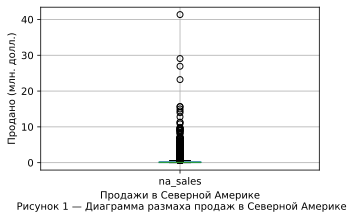

In [25]:
frame.boxplot(column = ["na_sales"], figsize = (5, 3))
plt.xlabel("Продажи в Северной Америке\n Рисунок 1 — \
Диаграмма размаха продаж в Северной Америке")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

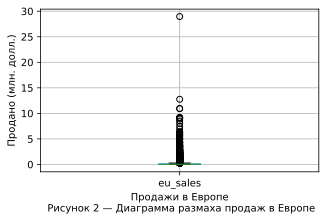

In [26]:
frame.boxplot(column = ["eu_sales"], figsize = (5, 3))
plt.xlabel("Продажи в Европе\n Рисунок 2 — \
Диаграмма размаха продаж в Европе")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

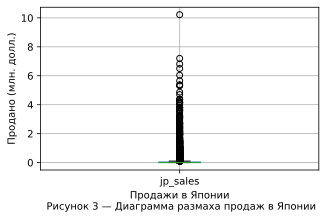

In [27]:
frame.boxplot(column = ["jp_sales"], figsize = (5, 3))
plt.xlabel("Продажи в Японии\n Рисунок 3 — \
Диаграмма размаха продаж в Японии")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

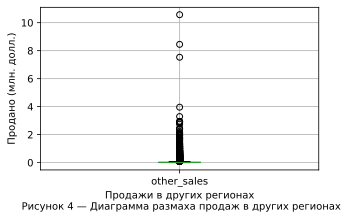

In [28]:
frame.boxplot(column = ["other_sales"], figsize = (5, 3))
plt.xlabel("Продажи в других регионах\n Рисунок 4 — \
Диаграмма размаха продаж в других регионах")
plt.ylabel("Продано (млн. долл.)")

<div align="justify">На графиках выше очевидны экстремальные выбросы. Однако мы не можем удалить их без более детального изучения. Выведем строки, содержащие выбросы и рассмотрим их.</div>

In [29]:
frame[frame["na_sales"] > 40]

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii             2006  Sports     41.36     28.96      3.77   

   other_sales  critic_score  user_score rating  total_sales  
0         8.45          76.0         8.0      E        82.54

In [30]:
frame[frame["eu_sales"] > 25]

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii             2006  Sports     41.36     28.96      3.77   

   other_sales  critic_score  user_score rating  total_sales  
0         8.45          76.0         8.0      E        82.54

In [31]:
frame[frame["jp_sales"] > 10]

name platform  year_of_release         genre  na_sales  \
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
4      8.89     10.22          1.0       72.3522    7.707605    NaN   

   total_sales  
4        31.38

In [32]:
frame[frame["other_sales"] > 6]

name platform  year_of_release   genre  na_sales  \
0                      Wii Sports      Wii             2006  Sports     41.36   
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43   
48                 Gran Turismo 4      PS2             2004  Racing      3.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      28.96      3.77         8.45          76.0         8.0      E   
17      0.40      0.41        10.57          95.0         9.0      M   
48      0.01      1.10         7.53          89.0         8.5      E   

    total_sales  
0         82.54  
17        20.81  
48        11.65

<div align="justify">В трех случаях из четырех фигурирует игра "Wii Sports". Данная игра является абсолютным рекордсменом по количеству продаж за всю историю видеоигр. На текущий момент по всему миру было продано более 80 млн. копий, учитывая продажи вместе с консолью. Из чего следует вывод, что данный выброс является показателем невероятного успеха, поэтому не может быть удален.</div>  
<br>
<div align="justify">"Pokemon Red/Pokemon Blue" — одна из игр популярной серии. По некоторым данным, в мире продано более 31 млн. копий. Данное значение так же не удаляем.</div>     
<br>
<div align="justify">"Grand Theft Auto: San Andreas" также является одной из игр популярной серии. Продажи в мире насчитывают более 27 млн. копий. Данное значение так же не удаляем.</div>     
<br>
<div align="justify">В мире было реализовано более 11 млн. копий "Gran Turismo 4". Данное значение так же не удаляем.</div>     
<br>
<div align="justify">Таким образом, мы выяснили, что, хоть некоторые значения и лежат в области экстремальных выбросов, избавляться от них было бы абсолютно неправильно, поскольку именно эти значения демонстрируют успех в мире видеоигр.</div>

Предобработка данных завершена.
<br>
<br>
<br>

### 2. Исследовательский анализ данных
<br>
Основные задачи этапа:<br>
<br>
1. Определить, сколько игр выпускалось в разные годы.
<br>
<br>
<div align="justify">— Определить, как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?</div>
<br>
<div align="justify">— Рассмотреть данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.</div>
<br>
2. Определить, какие платформы лидируют по продажам, растут или падают. Выберите несколько потенциально прибыльных платформ.
<br>
<br>
— Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
<br>
<br>
<div align="justify">— Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы. Соотнесите выводы с продажами игр на других платформах.</div>
<br>
<div align="justify">— Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</div>

Определим количество проданных игр в разные годы.    
<br>
<div align="justify">Целью данного исследования является выявление закономерностей, определяющих успешность игры. Поскольку игровая индустрия развивается стремительно, мы начнем наше исследование с изучения количества игр, выпущенных в разные годы, времени актуальности платформ, а также популярности разных игровых жанров.</div>

<div align="justify">Рассмотрим, какое количество игр выпускалось в разные годы, исключив из выборки 1000 год, т.к. это значение было присвоено строкам, для которых год не указан.</div>

Text(0.5, 0, 'Год \n Рисунок 5 — Количество игр, выпущенных в разные годы')

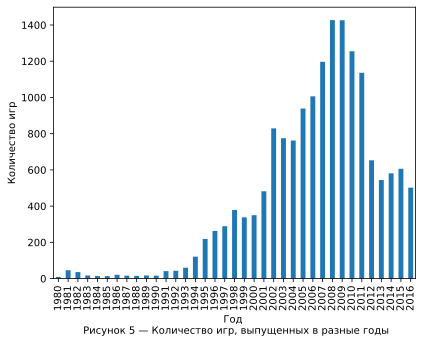

In [33]:
real_frame = frame[frame["year_of_release"] != 1000]

real_frame.groupby("year_of_release")["name"].count().plot(
    kind = "bar", figsize = (6.5, 5))
plt.ylabel("Количество игр")
plt.xlabel("Год \n Рисунок 5 — Количество игр, выпущенных в разные годы")

<div align="justify">На данном графике видно, что с 1991 года начался рост количества выпускаемых игр, в 2002 году был резкий подъем, а затем небольшой спад в 2003-2004 гг. Пик продаж видеоигр приходится на 2008-2009 гг., за которым следует спад до 2012 года. Данный спад можно связать с мировым экономическим кризисом. В 2013-2016 гг. продажи игр "вышли на плато", что может быть связано как с последствиями кризиса и падением продаж консолей, так и с ростом популярности браузерных игр и игр для мобильных устройств.</div>

<div align="justify">Для прогнозирования успешности игры в 2017 году нам необходимо выделить актуальный период. Данные с 2001 года по 2016 год выглядят нормально распределенными. Проведем тест Шапиро-Уилка, чтобы убедиться в этом.</div>

In [34]:
normal_test = real_frame.query("year_of_release > 2000")
normal_test = normal_test.groupby("year_of_release")["name"].count()
st.shapiro(normal_test)
pvalue = st.shapiro(normal_test)[1]
alpha = 0.05
if pvalue > alpha:
    print("Гауссово распределение.")
else:
    print("Ненормальное распределение.")

Гауссово распределение.


Теперь выделим период с 2001 по 2016 гг.. В дальнейшем мы будем работать с этими данными.

In [35]:
normal_frame = frame[frame["year_of_release"] > 2000]

Поскольку в наших данных представлено достаточно много разнообразных платформ, нам следует сконцентрировать свое внимание на актуальных, т.к. именно они помогут спрогнозировать успешность игры. Но для начала посмотрим, как долго в среднем живут платформы.

Text(0.5, 6.0, 'Платформа \n Рисунок 6 — Тепловая карта жизненного цикла платформ')

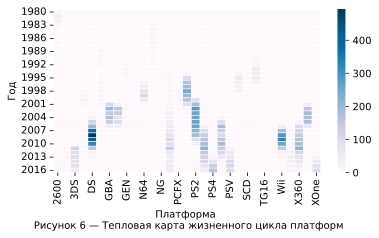

In [36]:
plt.figure(figsize = (6, 3))
sns.heatmap(pd.crosstab(real_frame["year_of_release"], real_frame["platform"]), 
            cmap="PuBu", linewidths=.5)
plt.ylabel("Год")
plt.xlabel("Платформа \n Рисунок 6 — Тепловая карта жизненного цикла платформ")

<div align="justify">Данная тепловая карта показывает, что срок жизни различных платформ ограничен. Жизненный цикл длится около 10 лет. В среднем, новые платформы появляются каждые пару лет. Платформы нового поколения одной линейки в среднем выпускаются на 7 год после релиза платформы-предшественника.</div>

Определим потенциально прибыльную платформу на 2017 год.    
<br>
Для начала выясним, какие платформы самые прибыльные в актуальном периоде.

In [37]:
normal_frame.groupby("platform")["total_sales"].sum().sort_values(
    ascending = False).head(5)

platform
PS2     1194.39
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

Построим графики распределения прибыли от продаж игр для каждой топ-платформы по годам.

Text(0, 0.5, 'Продано (млн. долл.)')

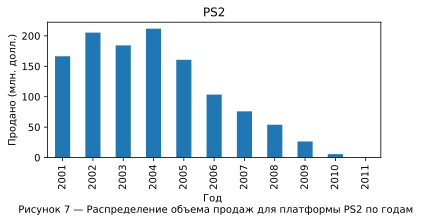

In [38]:
PS2 = normal_frame.query("platform == 'PS2'")
PS2.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                         figsize = (6, 2.5), title = "PS2")
plt.xlabel("Год \n Рисунок 7 — Распределение объема продаж для платформы PS2 по годам")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

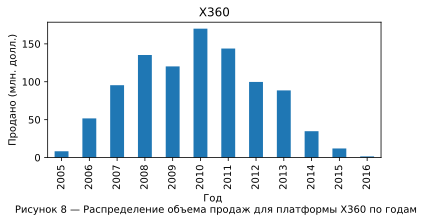

In [39]:
X360 = normal_frame.query("platform == 'X360'")
X360.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                          figsize = (6, 2.5), title = "X360")
plt.xlabel("Год \n Рисунок 8 — Распределение объема продаж для платформы X360 по годам")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

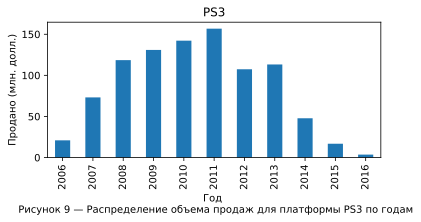

In [40]:
PS3 = normal_frame.query("platform == 'PS3'")
PS3.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                         figsize = (6, 2.5), title = "PS3")
plt.xlabel("Год \n Рисунок 9 — Распределение объема продаж для платформы PS3 по годам")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

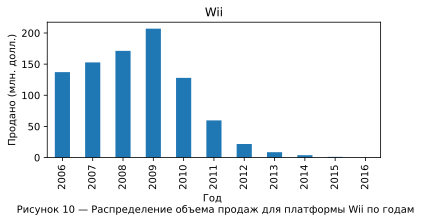

In [41]:
Wii = normal_frame.query("platform == 'Wii'")
Wii.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                         figsize = (6, 2.5), title = "Wii")
plt.xlabel("Год \n Рисунок 10 — Распределение объема продаж для платформы Wii по годам")
plt.ylabel("Продано (млн. долл.)")

Text(0, 0.5, 'Продано (млн. долл.)')

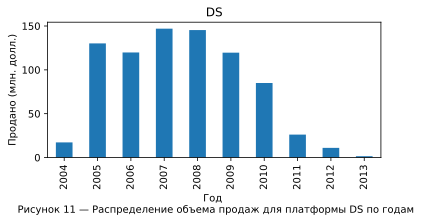

In [42]:
DS = normal_frame.query("platform == 'DS'")
DS.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                        figsize = (6, 2.5), title = "DS")
plt.xlabel("Год \n Рисунок 11 — Распределение объема продаж для платформы DS по годам")
plt.ylabel("Продано (млн. долл.)")

<div align="justify">Рассмотрим графики по следующим платформам: PS2, X360, PS3, Wii и DS. Эти платформы однозначно нельзя назвать потенциально прибыльными, поскольку в 2016 году объем продаж игр на эти консоли либо отсутствует, либо очень мал. Однако у этих графиков есть общая черта: пик продаж приходится на 4-6 год после релиза платформы. Такое распределение можно объяснить тем, что на рынок, как правило, поступает довольно сырой продукт, который в последующем дорабатывается и обновляется. При этом новые игры выпускают достаточно медленно, и какое-то время продолжают выпускать их и на консоли нового поколения, и на их предшественников. Поэтому большинство пользователей не спешит расставаться с более старой платформой и покупать новинку.</div>
<br>
<div align="justify">Для того чтобы определить потенциально прибыльные платформы на 2017 год, рассмотрим те из них, которые были актуальны на рынке после 2011 года, но еще не достигли пика популярности.</div>

Text(0.5, 24.0, 'Платформа \nРисунок 12 — Тепловая карта жизненного цикла платформ с 2012 года')

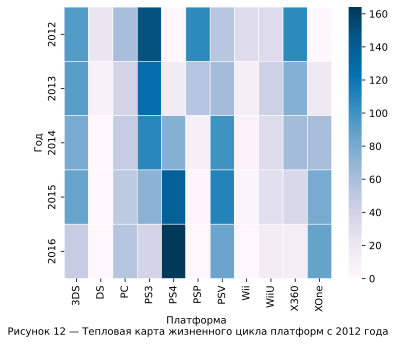

In [43]:
plt.figure(figsize = (6, 5))
data_plot = normal_frame.query("year_of_release > 2011")
sns.heatmap(pd.crosstab(data_plot["year_of_release"], data_plot["platform"]), cmap="PuBu", 
            linewidths=.5)
plt.ylabel("Год")
plt.xlabel("Платформа \nРисунок 12 — Тепловая карта жизненного цикла платформ с 2012 года")

<div align="justify">3DS, PSV и WiiU уже достаточно долго находятся на рынке, и их популярность идет на спад. Также, согласно выводам, сделанным ранее, в среднем уже через 2-3 года эти платформы заменят модели следующего поколения. Потенциально прибыльными данные платформы назвать нельзя.</div>
<br>
<div align="justify">Теперь обратим внимание на PS4 и XOne. Платформы уверенно набирают популярность, следовательно, у нас есть все основания полагать, что эти платформы являются потенциально прибыльными. Более того, PS4 и XOne вышли на рынок всего 4 года назад, а это значит, что в среднем у них еще около 6 лет для того, чтобы завоевать лидирующую позицию на рынке.</div>
<br>
<div align="justify">Итак, мы остановились на двух платформах: PS4 и XOne. Убедимся в верности нашего выбора, построив для них гистограммы по продажам.</div>

Text(0.5, 0, 'Год  \n Рисунок 13 — Распределение объема продаж для платформы PS4 по годам')

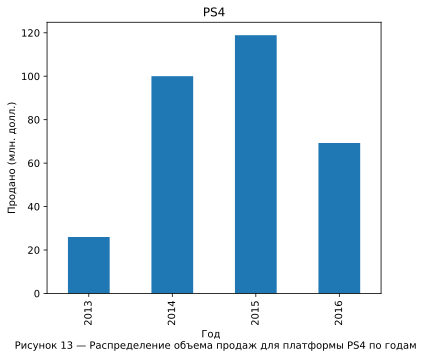

In [44]:
PS4 = normal_frame.query("platform == 'PS4'")
PS4.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                         figsize = (6, 5), title = "PS4")
plt.ylabel("Продано (млн. долл.)")
plt.xlabel("Год  \n Рисунок 13 — Распределение объема продаж для платформы PS4 по годам")

Text(0.5, 0, 'Год \n Рисунок 14 — Распределение объема продаж \n для платформы XOne по годам')

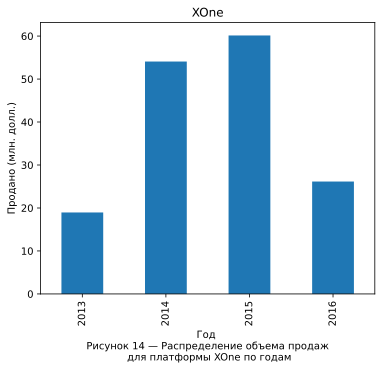

In [45]:
XOne = normal_frame.query("platform == 'XOne'")
XOne.groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", 
                                                          figsize = (6, 5), title = "XOne")
plt.ylabel("Продано (млн. долл.)")
plt.xlabel("Год \n Рисунок 14 — Распределение объема продаж \n для платформы XOne по годам")

<div align="justify">Общая тенденция с падением объема продаж в 2016 году прослеживается в обоих графиках. Этот спад, скорее всего, связан с общим падением продаж и возрастающей популярностью браузерных и мобильных игр. Однако у нас есть все основания полагать, что эта тенденция не сохранится в 2017 году.</div>

<div align="justify">Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам. Ранее мы уже изучили выбросы и пришли к выводу, что избавляться от них неправильно. Сейчас нам гораздо интереснее посмотреть на длину ящика (межквартильный размах). Для этого выставим ограничение по оси абсцисс.</div> 

Text(0.5, 0, 'Общие продажи  \n Рисунок 15 — Общий объем продаж по платформам')

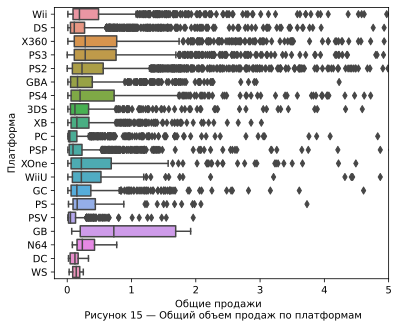

In [46]:
plt.rcParams['figure.figsize'] = 6, 5
sns.boxplot(x = "total_sales", y = "platform", data = normal_frame)
plt.xlim(-0.2, 5)
plt.ylabel("Платформа")
plt.xlabel("Общие продажи  \n Рисунок 15 — Общий объем продаж по платформам")

<div align="justify">Практически для всех платформ прослеживается одна особенность: медиана отклонена влево. Это значит, что не так много игр обретают огромную популярность и приносят значительный доход; основное количество показывает достаточно небольшой объем продаж. В целом, это можно связать с высоким уровнем конкуренциии на рынке: в мире существует множество фирм-разработчиков видеоигр, а также множество отдельных разработчиков и небольших коллективов, работающих без финансовой поддержки крупных издателей. Иными словами, рынок переполнен продуктом, не получившим широкого распространения и поддержки пользователей.</div>   
<br>
<div align="justify">Также график наглядно демонстрирует, что выбранные нами платформы, PS4 и XOne, не уступают платформам предыдущего поколения, хотя на рынок они вышли гораздо позже.</div>

<div align="justify">Итак, мы убедились, что PS4 и XOne являются наиболее потенциально прибыльными платформами. Однако нам все еще предстоит выяснить, игры какого жанра принесут больше прибыли. Но сначала изучим оценки пользователей и критиков и их влияние на объем продаж.</div>   
<br>
Оценки критиков измеряются по стобальной шкале. Для удобства напишем функцию, которая будет группировать оценки.

In [47]:
def score(x):
    """
    Данная функция делит оценки критиков на группы по следующему принципу:
    - x <= 10 -> 1
    - 10 < x <= 20 -> 2
    - 20 < x <= 30 -> 3
    - 30 < x <= 40 -> 4
    - 40 < x <= 50 -> 5
    - 50 < x <= 60 -> 6
    - 60 < x <= 70 -> 7
    - 70 < x <= 80 -> 8
    - 80 < x <= 90 -> 9
    - 90 < x <= 100 -> 10
    """
    if x <= 10:
        return 1
    if 10 < x <= 20:
        return 2
    if 20 < x <= 30:
        return 3
    if 30 < x <= 40:
        return 4
    if 40 < x <= 50:
        return 5
    if 50 < x <= 60:
        return 6
    if 60 < x <= 70:
        return 7
    if 70 < x <= 80:
        return 8
    if 80 < x <= 90:
        return 9
    return 10

Оценки пользователей измеряются по десятибальной шкале. Напишем функцию, которая разделит их на группы.

In [48]:
def uscore(x):
    """
    Данная функция делит оценки пользователей на группы по следующему принципу:
    - x <= 1 -> 1
    - 1 < x <= 2 -> 2
    - 2 < x <= 3 -> 3
    - 3 < x <= 4 -> 4
    - 4 < x <= 5 -> 5
    - 5 < x <= 6 -> 6
    - 6 < x <= 7 -> 7
    - 7 < x <= 8 -> 8
    - 8 < x <= 9 -> 9
    - 9 < x <= 10 -> 10
    """
    if x <= 1:
        return 1
    if 1 < x <= 2:
        return 2
    if 2 < x <= 3:
        return 3
    if 3 < x <= 4:
        return 4
    if 4 < x <= 5:
        return 5
    if 5 < x <= 6:
        return 6
    if 6 < x <= 7:
        return 7
    if 7 < x <= 8:
        return 8
    if 8 < x <= 9:
        return 9
    return 10

Добавим два новых столбца с сгруппированными оценками в наши данные.

In [49]:
frame["critic_score_bin"] = frame["critic_score"].apply(score)
frame["user_score_bin"] = frame["user_score"].apply(uscore)

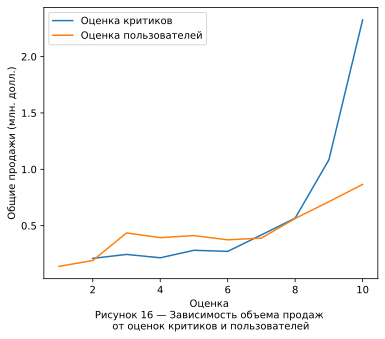

In [50]:
fig, ax = plt.subplots()
frame.groupby(["critic_score_bin"])["total_sales"].mean().plot(figsize = (6, 5))
frame.groupby(["user_score_bin"])["total_sales"].mean().plot(figsize = (6, 5))
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel(
"Оценка \nРисунок 16 — Зависимость объема продаж \nот оценок критиков и пользователей"
)
plt.legend(['Оценка критиков', 'Оценка пользователей'])

<div align="justify">Ранее мы уже выяснили, что между оценками пользователей и критиков существует умеренная корреляция. Данный график наглядно демонстрирует эту зависимость, а также показывает наличие корреляции между оценками пользователей и критиков и уровнем продаж. Рассмотрим эту зависимость для оценок отдельно.</div>

In [51]:
sns.set_theme(style='white')
sns.relplot(x = "critic_score", y = "total_sales", data = frame, alpha = 1, 
            color = "cornflowerblue", height= 5, aspect= 3.5/3)
plt.grid()
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel(
"Оценка критиков \n Рисунок 17 — Зависимость объема продаж от оценок критиков")

Text(0.5, 8.95999999999998, 'Оценка критиков \n Рисунок 17 — Зависимость объема продаж от оценок критиков')

In [52]:
sns.set_theme(style='white')
sns.relplot(x = "user_score", y = "total_sales", data = frame, alpha = 1, 
            color = "mediumpurple", height= 5, aspect= 3.5/3)
plt.grid()
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel(
"Оценка пользователей \n Рисунок 18 — Зависимость объема продаж от оценок пользователей")

Text(0.5, 8.95999999999998, 'Оценка пользователей \n Рисунок 18 — Зависимость объема продаж от оценок пользователей')

<div align="justify">На обоих графиках прослеживается зависимость продаж от оценок, однако, кажется, что корреляция достаточно слабая. Вычислим корреляцию.</div>

In [53]:
frame[["critic_score", "user_score", "total_sales"]].corr()

critic_score  user_score  total_sales
critic_score      1.000000    0.507263     0.190696
user_score        0.507263    1.000000     0.076631
total_sales       0.190696    0.076631     1.000000

<div align="justify">Действительно, корреляция между оценками и объемом продаж очень слабая, 0.19 для оценок критиков и 0.07 для оценок пользователей.</div>     
Рассмотрим корреляцию для потенциально прибыльных платформ.

In [54]:
PS4[["critic_score", "user_score", "total_sales"]].corr()

critic_score  user_score  total_sales
critic_score      1.000000    0.520382     0.341804
user_score        0.520382    1.000000    -0.079600
total_sales       0.341804   -0.079600     1.000000

In [55]:
XOne[["critic_score", "user_score", "total_sales"]].corr()

critic_score  user_score  total_sales
critic_score      1.000000    0.474653     0.363880
user_score        0.474653    1.000000    -0.076183
total_sales       0.363880   -0.076183     1.000000

<div align="justify">Для обеих платформ картина схожа: корреляция между оценками критиков и продажами средняя положительная, в то время как между оценками пользователей и продажами — слабая отрицательная.</div>

<div align="justify">Посмотрим, как выглядит корреляция между оценками и продажами для платформ PS4 и XOne на диаграмме рассеяния. Чтобы сравнивать графики было удобнее, по оси абсцисс выведем не сами оценки, а их группы.</div>

In [56]:
PS4["critic_score_bin"] = PS4["critic_score"].apply(score)
PS4["user_score_bin"] = PS4["user_score"].apply(uscore)

Text(0.5, 8.95999999999998, 'Оценка критиков (группа) \n Рисунок 19 — Зависимость объема продаж от оценок критиков')

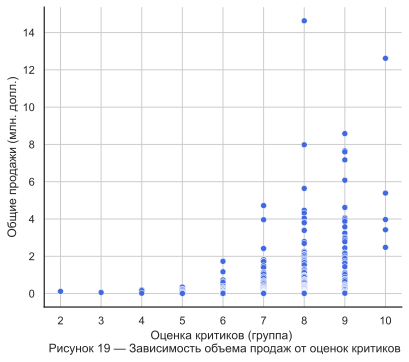

In [57]:
sns.relplot(x = "critic_score_bin", y = "total_sales", data = PS4, color = "royalblue", 
            height= 5, aspect= 3.5/3)
plt.grid()
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel(
"Оценка критиков (группа) \n Рисунок 19 — Зависимость объема продаж от оценок критиков")

Text(0.5, 8.95999999999998, 'Оценка пользователей (группа) \n Рисунок 20 — Зависимость объема продажот оценок пользователей')

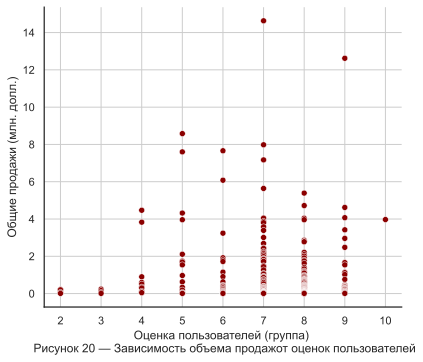

In [58]:
sns.relplot(x = "user_score_bin", y = "total_sales", data = PS4, color = "darkred", 
            height= 5, aspect= 3.5/3)
plt.grid()
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel(
"Оценка пользователей (группа) \n Рисунок 20 — Зависимость объема продаж\
от оценок пользователей")

<div align="justify">Из всего вышеперечисленного мы можем сделать вывод, что оценки пользователей хоть и влияют на уровень продаж, но незначительно. Гораздо более важной является оценка критиков.</div>
<br>
Изучим, какие жанры критики оценивают лучше других.

In [59]:
normal_frame.groupby("genre")["critic_score"].median().sort_values(ascending = False)

genre
Role-Playing    72.000000
Shooter         71.000000
Strategy        69.415385
Fighting        68.707576
Sports          68.251177
Puzzle          68.000000
Racing          66.347701
Platform        65.834485
Action          65.000000
Simulation      65.000000
Misc            64.200000
Adventure       64.000000
Name: critic_score, dtype: float64

<div align="justify">Выше всего критики оценивают жанр РПГ (Role-Playing), затем идут стратегии, файтинги, шутеры и спортивные игры. Сложнее всего угодить критикам в жанре приключения.</div>

Посмотрим, каких жанров на рынке больше, и как распределяются продажи.

In [60]:
normal_frame.groupby("genre")["total_sales"].sum().sort_values(ascending = False).head(3)

genre
Action     1492.18
Sports     1089.68
Shooter     905.87
Name: total_sales, dtype: float64

Text(0.5, 0, 'Жанр \n Рисунок 21 — Распределение объема продаж по жанрам')

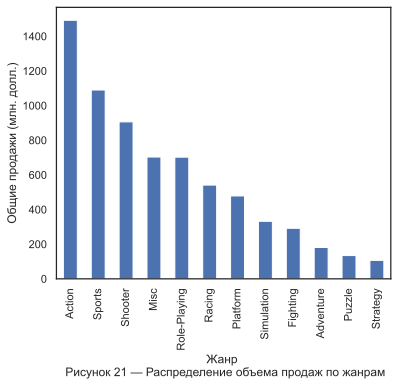

In [61]:
normal_frame.groupby("genre")["total_sales"].sum().sort_values(
    ascending = False).plot(kind = "bar", figsize = (6, 5))
plt.ylabel("Общие продажи (млн. долл.)")
plt.xlabel("Жанр \n Рисунок 21 — Распределение объема продаж по жанрам")

<div align="justify">Абсолютным лидером по общим продажам является жанр экшен, а закрывают список стратегии. Посмотрим на количество игр каждого жанра.</div>

In [62]:
normal_frame["genre"].value_counts(normalize = True).head(3)

Action    0.214943
Sports    0.134419
Misc      0.111686
Name: genre, dtype: float64

Text(0.5, 0, 'Рисунок 22 — Доля жанров')

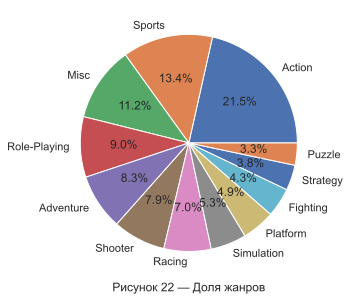

In [63]:
normal_frame["genre"].value_counts(normalize = True).plot.pie(
    autopct="%.1f%%", figsize = (6, 5))
plt.ylabel("")
plt.xlabel("Рисунок 22 — Доля жанров")

<div align="justify">Большинство игр выпускаются в жанре экшен, меньшинство — в жанре стратегии. Из всего вышесказанного мы можем сделать вывод, что выпускать игру в жанре стратегии достаточно опасно, она может не принести ожидаемого дохода, а игру в жанре экшен ожидает достаточно серьезная конкуренция, поэтому выпускать такую игру тоже достаточно большой риск.      
Для того чтобы найти золотую середину, рассмотрим средние продажи по жанрам.</div>

Text(0.5, 0, 'Жанр \n Рисунок 23 — Среднее значение объема продаж по жанрам')

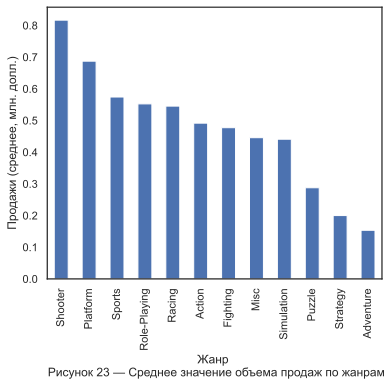

In [64]:
normal_frame.groupby("genre")["total_sales"].mean().sort_values(
    ascending = False).plot(kind = "bar", figsize = (6, 5))
plt.ylabel("Продажи (среднее, млн. долл.)")
plt.xlabel("Жанр \n Рисунок 23 — Среднее значение объема продаж по жанрам")

<div align="justify">Наиболее прибыльными, в среднем, являются шутеры и платформеры, за ними следуют спортивные игры, РПГ и гонки. Следовательно, наименьший риск связан с выпуском именно этих игр.</div>      
<br>
Вернемся к нашим потенциально прибыльным платформам и проверим, верен ли данный вывод и для них.

Text(0.5, 0, 'Жанр \n Рисунок 24 — Среднее значение объема продаж по жанрам для PS4')

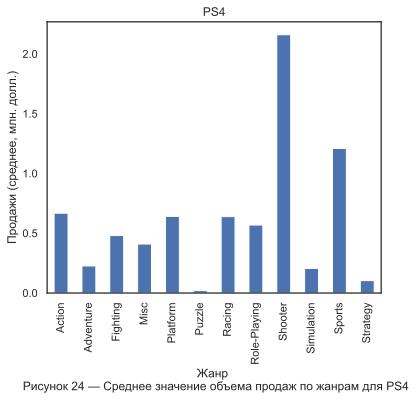

In [65]:
PS4.groupby("genre")["total_sales"].mean().plot(
    kind = "bar", figsize = (6, 5), title = "PS4")
plt.ylabel("Продажи (среднее, млн. долл.)")
plt.xlabel("Жанр \n Рисунок 24 — Среднее значение объема продаж по жанрам для PS4")

Text(0.5, 0, 'Жанр \n Рисунок 25 — Среднее значение объема продаж по жанрам для XOne')

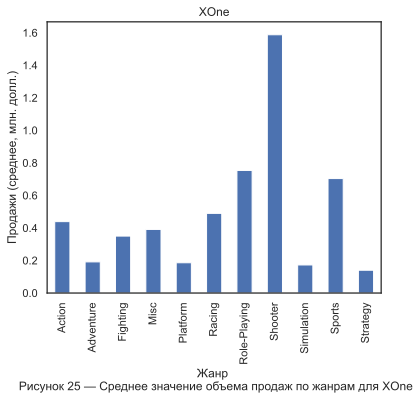

In [66]:
XOne.groupby("genre")["total_sales"].mean().plot(
    kind = "bar", figsize = (6, 5), title = "XOne")
plt.ylabel("Продажи (среднее, млн. долл.)")
plt.xlabel("Жанр \n Рисунок 25 — Среднее значение объема продаж по жанрам для XOne")

<div align="justify">Абсолютными лидерами для обеих платформ являются игры жанра шутер. Для PS4 второе место занимают спортивные игры. Для XOne на втором месте РПГ, немного отстают от них спортивные игры.</div>

<div align="justify">Учитывая все вышесказанное, мы пришли к выводу, что для PS4 лучше выпускать шутеры, спортивные игры и экшен игры, а для XOne шутеры, РПГ и спортивные игры. В следующей части мы составим портет пользователя для каждого региона и попытаемся определить наиболее прибыльные игры для каждой из платформ.</div>
<br>
<br>
<br>

### 3. Портрет пользователя
Основные задачи этапа:<br>
1. Составить портрет пользователя для каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
- Cамые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Объяснить разницу.
- Определить влияние рейтинга ESRB на продажи в отдельном регионе.

Составим портрет пользователя для каждого региона. Найдем топ-5 платформ для каждого региона.

In [67]:
normal_frame.groupby("platform")["na_sales"].sum().sort_values(ascending = False).head(5)

platform
X360    595.74
PS2     556.84
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

In [68]:
normal_frame.groupby("platform")["eu_sales"].sum().sort_values(ascending = False).head(5)

platform
PS3     327.21
PS2     321.99
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64

In [69]:
normal_frame.groupby("platform")["jp_sales"].sum().sort_values(ascending = False).head(5)

platform
DS     175.00
PS2    128.67
3DS    100.62
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64

Text(0.5, 0, 'Общие продажи (среднее, млн. долл.)\n             Рисунок 26 — Среднее значение объема продаж             \n по платформам для Северной Америки')

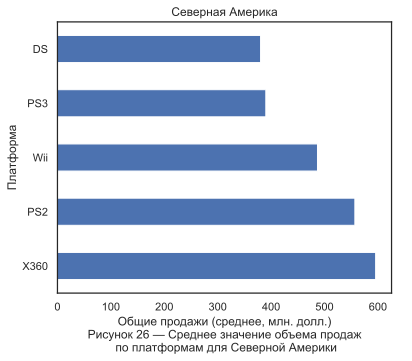

In [70]:
normal_frame.groupby("platform")["na_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Северная Америка", figsize = (6, 5))
plt.ylabel("Платформа")
plt.xlabel("Общие продажи (среднее, млн. долл.)\n \
            Рисунок 26 — Среднее значение объема продаж \
            \n по платформам для Северной Америки")

Text(0.5, 0, 'Общие продажи (среднее, млн. долл.)\n     Рисунок 27 — Среднее значение объема продаж     \n по платформам для Европы')

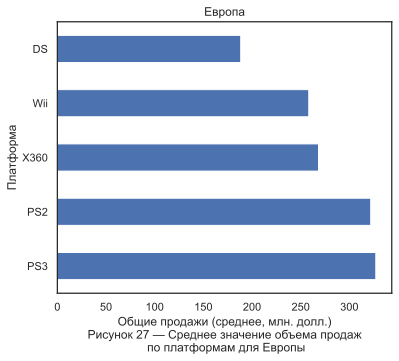

In [71]:
normal_frame.groupby("platform")["eu_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Европа", figsize = (6, 5))
plt.ylabel("Платформа")
plt.xlabel("Общие продажи (среднее, млн. долл.)\n \
    Рисунок 27 — Среднее значение объема продаж \
    \n по платформам для Европы")


Text(0.5, 0, 'Общие продажи (среднее, млн. долл.) \n             Рисунок 28 — Среднее значение объема продаж             \n по платформам для Японии')

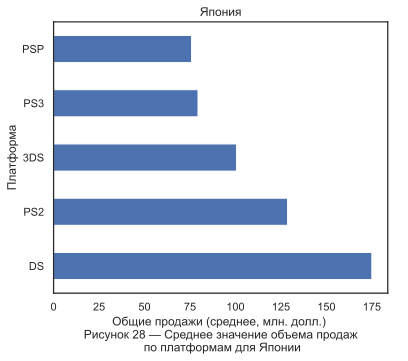

In [72]:
normal_frame.groupby("platform")["jp_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Япония", figsize = (6, 5))
plt.ylabel("Платформа")
plt.xlabel("Общие продажи (среднее, млн. долл.) \n \
            Рисунок 28 — Среднее значение объема продаж \
            \n по платформам для Японии")

<div align="justify">Самыми популярными платформами для Северной Америки являются: X360, PS2, Wii, PS3 и DS, для Европы: PS3, PS2, X360, Wii и DS, а для Японии: DS, PS2, 3DS, PS3 и PSP.</div>  
<br>
<div align="justify">Наборы топ-5 платформ для Серверной Америки и Европы очень похожи, а вот для Японии достаточно сильно отличается. Такое отличие, по-видимому, связано с менталитетом. В Японии большинство платформ являются портативными (карманными) консолями, в то время как в Европе и Северной Америке — игровыми приставками.</div>     

Теперь рассмотрим самые популярные жанры в разных регионах.

Text(0.5, 0, 'Продажи (млн. долл.)\n Рисунок 29 — Объем продаж     \n по жанрам для Северной Америки')

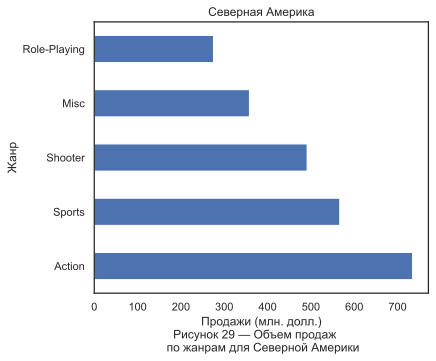

In [73]:
normal_frame.groupby("genre")["na_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Северная Америка", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (млн. долл.)\n Рисунок 29 — Объем продаж \
    \n по жанрам для Северной Америки")

Text(0.5, 0, 'Продажи (млн. долл.)\n Рисунок 30 — Объем продаж     \n по жанрам для Европы')

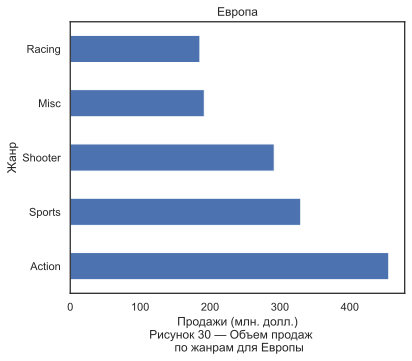

In [74]:
normal_frame.groupby("genre")["eu_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Европа", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (млн. долл.)\n Рисунок 30 — Объем продаж \
    \n по жанрам для Европы")

Text(0.5, 0, 'Продажи (млн. долл.) \n Рисунок 31 — Объем продаж     \n по жанрам для Японии')

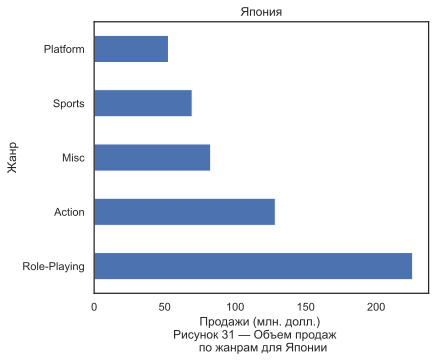

In [75]:
normal_frame.groupby("genre")["jp_sales"].sum().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Япония", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (млн. долл.) \n Рисунок 31 — Объем продаж \
    \n по жанрам для Японии")

<div align="justify">Для Северной Америки и Европы лидерами являются экшен, спортивные игры и шутеры. Для Японии — РПГ, экшены и misc(аркада).</div>
<br>
Рассмотрим, игры каких жанров в среднем наиболее прибыльны.

Text(0.5, 0, 'Продажи (среднее, млн. долл.)\n     Рисунок 32 — Среднее значение объема продаж     \n по жанрам для Северной Америки')

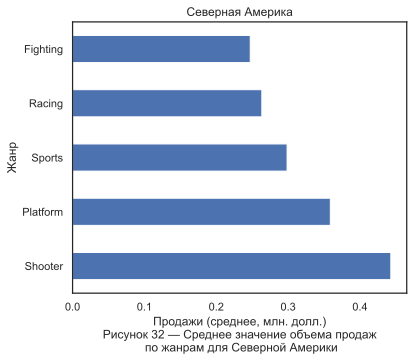

In [76]:
normal_frame.groupby("genre")["na_sales"].mean().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Северная Америка", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (среднее, млн. долл.)\n \
    Рисунок 32 — Среднее значение объема продаж \
    \n по жанрам для Северной Америки")

Text(0.5, 0, 'Продажи (среднее, млн. долл.)\n     Рисунок 33 — Среднее значение объема продаж     \n по жанрам для Европы')

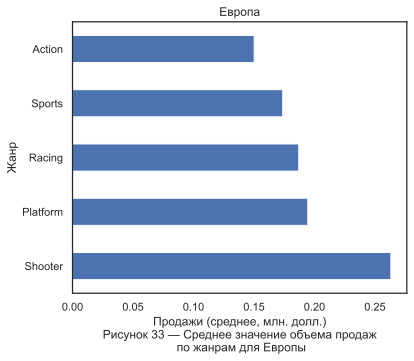

In [77]:
normal_frame.groupby("genre")["eu_sales"].mean().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Европа", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (среднее, млн. долл.)\n \
    Рисунок 33 — Среднее значение объема продаж \
    \n по жанрам для Европы")

Text(0.5, 0, 'Продажи (среднее, млн. долл.) \n     Рисунок 34 — Среднее значение объема продаж     \n по жанрам для Японии')

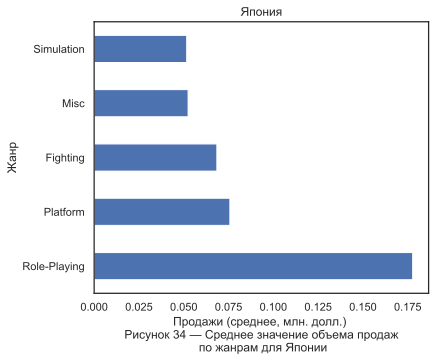

In [78]:
normal_frame.groupby("genre")["jp_sales"].mean().sort_values(
    ascending = False).head(5).plot(
    kind = "barh", title = "Япония", figsize = (6, 5))
plt.ylabel("Жанр")
plt.xlabel("Продажи (среднее, млн. долл.) \n \
    Рисунок 34 — Среднее значение объема продаж \
    \n по жанрам для Японии")

<div align="justify">Самыми прибыльными, в среднем, являются шутеры, платформеры и спортивные игры для Северной Америки, шутеры, платформеры и гонки для Европы и РПГ, платформеры и файтинги для Японии.</div>

Теперь рассмотрим влияние возрастного рейтинга на продажи.

In [79]:
real_frame.groupby(["genre", "rating"])["na_sales"].sum().sort_values(
    ascending = False).head(3)

genre    rating
Sports   E         449.20
Shooter  M         339.08
Action   M         280.15
Name: na_sales, dtype: float64

In [80]:
real_frame.groupby(["genre", "rating"])["eu_sales"].sum().sort_values(
    ascending = False).head(3)

genre    rating
Sports   E         247.56
Shooter  M         203.76
Action   M         196.88
Name: eu_sales, dtype: float64

In [81]:
real_frame.groupby(["genre", "rating"])["jp_sales"].sum().sort_values(
    ascending = False).head(3)

genre         rating
Role-Playing  T         73.04
Platform      E         40.09
Action        M         36.31
Name: jp_sales, dtype: float64

<div align="justify">Для Северной Америки и Европы лидерами являются спортивные игры с возрастным рейтингом "E" ("Everyone" — "Для всех", 6+ лет), шутеры с возрастным рейтингом "M" ("Mature" — "Для взрослых", 17+ лет) и экшены с возрастным рейтингом "M". Для Японии лидерами являются РПГ с возрастным рейтингом "T" ("Teen" — "Подросткам", 13+ лет), платформеры с возрастным рейтингом "Е" и экшены с возрастным рейтингом "M".</div>

Подводя итоги данного раздела, опишем пользователя для каждого региона:
- <div align="justify">Северная Америка: пользователь старше 17 лет, отдающий предпочтение платформам X360 (более поздняя версия — XOne) и PS2 (более поздняя версия — PS4) и играм в жанрах шутер ("М"), экшен ("М") и спортивным играм ("Е");</div>
- <div align="justify">Европа: пользователь старше 17 лет, отдающий предпочтение платформе PS3 (более поздняя версия — PS4) и играм в жанрах шутер ("М"), экшен ("М") и спортивным играм ("Е");</div>
- <div align="justify">Япония: пользователь старше 17 лет, отдающий предпочтение портативным платформам DS (более поздняя версия — DS3) и играм в жанрах РПГ ("Т"), платформерам ("Е") и экшенам ("М").</div>
<br>
<br>
<br>

### 4. Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.<br>
Пояснить:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>
<div align="justify">Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза —  это основное проверяемое предположение, которое в нашем случае формулируется как отсутствие различий между пользовательскими рейтингами платформ Xbox One и PC. Альтернативная гипотеза — это предположение, принимаемое в случае отклонения нулевой гипотезы, в нашем случае — пользовательские рейтинги платформ различны.</div>  
<br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.  <br>   
H1: Средние пользовательские рейтинги платформ Xbox One и PC различны.     
<br>
Установим уровень значимости (alpha) в 5%. Для проверки гипотезы используем метод scipy.stats.ttest_ind().     

In [82]:
XOne_userscore = normal_frame.where(
    normal_frame["platform"] == "XOne")["user_score"].dropna()
PC_userscore = normal_frame.where(
    normal_frame["platform"] == "PC")["user_score"].dropna()

In [83]:
alpha = 0.05 # Установим уровень значимости (alpha) в 5%.

if np.var(XOne_userscore) == np.var(PC_userscore): # Проверим равны ли дисперсии
    print("Дисперсии равны.")
    results = st.ttest_ind(
                        XOne_userscore, 
                        PC_userscore,
                        equal_var = True)
else:
    print("Дисперсии не равны.")
    results = st.ttest_ind(
                        XOne_userscore, 
                        PC_userscore,
                        equal_var = False)
    
if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Дисперсии не равны.
Мы отвергаем нулевую гипотезу.


Попробуем изменить альтернативную гипотезу.     
<br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.     
H1: Средние пользовательские рейтинги платформы Xbox One больше, чем у платформы PC. 

In [84]:
alpha = 0.05 # Установим уровень значимости (alpha) в 5%.
results = st.ttest_ind(
                        XOne_userscore, 
                        PC_userscore,
                        equal_var = False,
                        alternative='greater')

if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Мы сохраняем нулевую гипотезу.


В данном случае мы сохраняем нулевую гипотезу, что, основываясь на предыдущем исследовании, скорее всего, является ошибкой типа II.      
<br>
Изменим альтернативную гипотезу еще раз.     
<br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.     
H1: Средние пользовательские рейтинги платформы Xbox One меньше, чем у платформы PC.

In [85]:
alpha = 0.05 # Установим уровень значимости (alpha) в 5%.
results = st.ttest_ind(
                        XOne_userscore, 
                        PC_userscore,
                        equal_var = False,
                        alternative='less')

if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Мы отвергаем нулевую гипотезу.


Гипотеза №2. Средние пользовательские рейтинги жанра экшен и спортивных игр разные.
<br>
H0: Средние пользовательские рейтинги жанра экшен и спортивных игр одинаковы.     
H1: Средние пользовательские рейтинги жанра экшен и спортивных игр различны.

In [86]:
Action_userscore = normal_frame.where(
    normal_frame["genre"] == "Action")["user_score"].dropna()
Sports_userscore = normal_frame.where(
    normal_frame["genre"] == "Sports")["user_score"].dropna()

In [87]:
alpha = 0.05 # Установим уровень значимости (alpha) в 5%.
if np.var(Action_userscore) == np.var(Sports_userscore): # Проверим равны ли дисперсии
    print("Дисперсии равны.")
    results = st.ttest_ind(
                        Action_userscore, 
                        Sports_userscore,
                        equal_var = True)
else:
    print("Дисперсии не равны.")
    results = st.ttest_ind(
                        Action_userscore, 
                        Sports_userscore,
                        equal_var = False)
    
if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Дисперсии не равны.
Мы сохраняем нулевую гипотезу.


Попробуем изменить альтернативную гипотезу.   
<br>
H0: Средние пользовательские рейтинги жанра экшен и спортивных игр одинаковы.     
H1: Средние пользовательские рейтинги жанра экшен больше, чем у спортивных игр.

In [88]:
results = st.ttest_ind(
                        Action_userscore, 
                        Sports_userscore,
                        equal_var = False,
                        alternative='greater')

if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Мы сохраняем нулевую гипотезу.


Попробуем изменить альтернативную гипотезу.
<br>
H0: Средние пользовательские рейтинги жанра экшен и спортивных игр одинаковы.     
H1: Средние пользовательские рейтинги жанра экшен меньше, чем у спортивных игр.

In [89]:
results = st.ttest_ind(
                        Action_userscore, 
                        Sports_userscore,
                        equal_var = False,
                        alternative='less')

if (results.pvalue < alpha):
        print("Мы отвергаем нулевую гипотезу.")
else:
        print("Мы сохраняем нулевую гипотезу.")

Мы отвергаем нулевую гипотезу.


В данном случае мы отвергаем нулевую гипотезу, что, основываясь на предыдущем исследовании, скорее всего, является ошибкой типа I.
<br>
<br>
<br>

### 5. Выводы

В данном отчете мы проанализировали рынок видеоигр и определили закономерности, влияющие на успешность игры.
<br>
<div align="justify">Прежде всего, мы ознакомились с данными, выполнив описательную статистику. Основываясь на этом анализе, на этапе предварительной обработки мы изменили тип данных "год выпуска" на int, а "оценка пользователей" на float. Мы провели замену названий столбцов, а также заполнили пропуски средними значениями, сгруппировав данные по следующему принципу: по жанру, платформе, году выпуска; по жанру и платформе; по жанру. Такой подход позволил нам точнее определить значения для каждого пропуска. Мы проверили наличие дубликатов и выбросов. В процессе обработки выбросов мы выяснили, что, хоть некоторые значения и лежат в области экстремальных выбросов, избавляться от них было бы абсолютно неправильно, поскольку именно эти значения демонстрируют успех в мире видеоигр. Наконец, мы добавили дополнительный столбец, куда поместили суммарные продажи по всем регионам.</div>

<div align="justify">В разделе исследовательского анализа мы определили, сколько игр выпускалось в разные годы. Мы выяснили, что с 1991 года начался рост количества выпускаемых игр, в 2002 году был резкий подъем, а затем небольшой спад в 2003-2004 гг. Пик продаж видеоигр приходится на 2008-2009 гг., за которым следует спад до 2012 года. Данный спад можно связать с мировым экономическим кризисом. В 2013-2016 гг. продажи игр "вышли на плато", что может быть связано как с последствиями кризиса и падением продаж консолей, так и с ростом популярности браузерных игр и игр для мобильных устройств.</div>
<br>
<div align="justify">Для прогнозирования успешности игры в 2017 году нам было необходимо выделить актуальный период. Мы обратили внимание на данные с 2001 года по 2016 год и провели тест Шапиро-Уилка, чтобы убедиться в нормальном распределении. Все дальнейшее исследование было построено на этих данных.</div>
<br>
<div align="justify">Мы изучили платформы, представленные на рынке в этот период. В процессе анализа мы выяснили, что жизненный цикл платформ длится около 10 лет. В среднем, новые платформы появляются каждые пару лет. Платформы нового поколения одной линейки в среднем выпускаются на 7 год после релиза платформы-предшественника.</div>
<br>
<div align="justify">Мы определили самые прибыльные платформы (PS2, X360, PS3, Wii, DS), однако, выяснили, что эти платформы однозначно нельзя незвать потенциально прибыльными на 2017 год, поскольку в 2016 году объем продаж игр на эти консоли либо отсутствует, либо очень мал. Изучая распределение продаж по годам мы выяснили, что пик продаж приходится на 4-6 год после релиза платформы. Такое распраделение, по-видимому, можно объяснить тем, что на рынок, как правило, поступает довольно сырой продукт, который в последующем дорабатывается и обновляется. При этом новые игры выпускают достаточно медленно, и какое-то время продолжают выпускать их и на консоли нового поколения, и на их предшественников. Поэтому большинство пользователей не спешит расставаться с более старой платформой и покупать новинку.</div>
<br>
<div align="justify">Для определения потенциально прибыльных платформ, мы рассмотрели платформы в период с 2011 года, обращая внимание на те, которые еще не достигли пика популярности. Мы выяснили, что платформы 3DS, PSV и WiiU уже достаточно долго находятся на рынке, и их популярность идет на спад. А также предположили, что согласно выводам, сделанным ранее, в среднем уже через 2-3 года эти платформы заменят модели следующего поколения. Таким образом, вы выяснили, что потенциально прибыльными платформами являются PS4 и XOne, причем для PS4 данные по продажам более многообещающие.</div>
<br>
<div align="justify">Мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Практически для всех платформ прослеживается одна особенность: медиана отклонена влево. Это значит, что основное количество выпущенных игр показывает небольшой объем продаж. В целом это можно связать с достаточно большой конкуренцией на рынке: в мире существует множество фирм-разработчиков видеоигр, а также множество отдельных разработчиков и небольших коллективов, работающих без финансовой поддержки крупных издателей. Иными словами, рынок переполнен продуктом, не получившим широкого распространения и поддержки пользователей.</div>
<br>
<div align="justify">В ходе исследования мы изучили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Мы посчитали корреляцию между продажами и оценками и выяснили, что оценки пользователей хоть и влияют на уровень продаж, но незначительно (слабая отрицательная корреляция). Гораздо более важной является оценка критиков (средняя положительная корреляция).</div>
<br>
<div align="justify">Изучая игровые жанры, мы обнаружили, что большинство игр выпускаются в жанре экшен, меньшинство в жанре стратегии. Выпускать игру в жанре стратегии достаточно опасно, она может не принести ожидаемого дохода из-за низкой популярности, а игру в жанре экшен ожидает достаточно серьезная конкуренция, поэтому выпускать такую игру тоже достаточно большой риск. Для поиска потенциально прибыльного жанра мы изучили средние значения продаж для каждого из них и пришли к выводу, что для PS4 лучше выпускать шутеры и спортивные игры, а для XOne шутеры, РПГ и спортивные игры.</div>
<br>
В следующем разделе мы составили портрет пользователя для каждого региона:     

- <div align="justify">Северная Америка: пользователь старше 17 лет, отдающий предпочтение платформам X360 (более поздняя версия — XOne) и PS2 (более поздняя версия — PS4) и играм в жанрах шутер ("М"), экшен ("М") и спортивным играм ("Е");</div>
- <div align="justify">Европа: пользователь старше 17 лет, отдающий предпочтение платформе PS3 (более поздняя версия — PS4) и играм в жанрах шутер ("М"), экшен ("М") и спортивным играм ("Е");</div>
- <div align="justify">Япония: пользователь старше 17 лет, отдающий предпочтение портативным платформам DS (более поздняя версия — DS3) и играм в жанрах РПГ ("Т"), платформерам ("Е") и экшенам ("М").</div>

<br>Следующим шагом стала проверка статистических гипотез. Мы проверили две гипотезы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<br>
2. Средние пользовательские рейтинги жанра экшен и спортивных игр разные.     

Для обоих случаев мы проверили двустороннюю и 2 односторонние гипотезы:

<div align="justify">В первом случае мы отвергли нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различны.</div>
<div align="justify">Для второй гипотезы мы сохранили нулевую гипотезу: Средние пользовательские рейтинги жанра экшен и спортивных игр одинаковы.</div>
<br>
<div align="justify">Таким образом, подводя итог всему исследованию, мы можем заключить, что инвестирование в Японский рынок видеоигр в 2017 году нежелателен: в ближайшие пару лет мы ожидаем выход новой платформы. Для Северной Америки и Европы наиболее перспективной платформой является PS4. Выбирая между Европой и Северной Америкой, стоит отдать предпочтение Северной Америке, так как общие продажи в этом регионе выше. Однако нам следует отметить, что в целом рынки видеоигр в этих регионах очень похожи, поэтому можно выпустить продукт, удовлетворяющий потребностям обоих регионов. Не смотря на популярность игр в жанре экшен, мы пришли к выводу, что в силу высокой конкуренции и относительно низкого среднего показателя продаж, выпускать такие игры не стоит. Наиболее потенциально прибыльным жанром в данном исследовании мы определили шутеры, с возрастным рейтингом "M".</div>